In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr

In [2]:
import glob

In [3]:
mswep_daily = xr.open_dataset('/g/data/ia39/aus-ref-clim-data-nci/mswep/data/day/mswep_v280_day_2020.nc')

In [4]:
mswep_oct = mswep_daily.sel(time = slice('2020-10-01', '2020-11-01')).precipitation

In [5]:
era_regimes = xr.open_dataset('/scratch/nf33/hk25-ConvZones/era_regimes.nc')['__xarray_dataarray_variable__']
era_regimes

<xarray.DataArray '__xarray_dataarray_variable__' (latitude: 721,
                                                   longitude: 1440)>
[1038240 values with dtype=float64]
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0

In [6]:
from dask.diagnostics import ProgressBar

In [7]:
with ProgressBar():
    mswep_oct_load = mswep_oct.load()

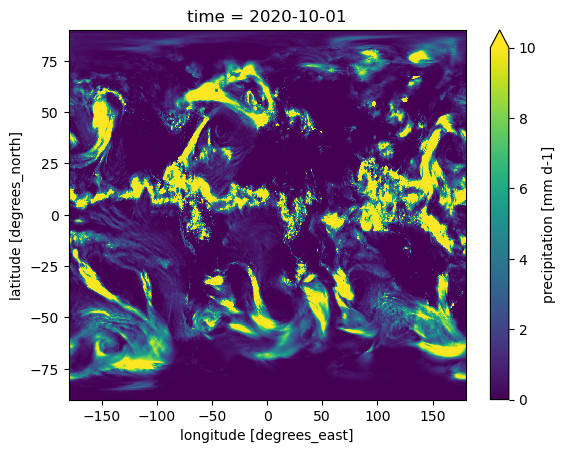

In [8]:
mswep_oct_load.isel(time=0).plot(vmax=10)

In [9]:
import xesmf as xe

In [30]:
xe.util.cf_grid_2d(float(era_regimes.longitude[0]), float(era_regimes.longitude[-1]), float(era_regimes.longitude.diff('longitude')[1]),
                   -float(era_regimes.latitude[0]), -float(era_regimes.latitude[-1]), -float(era_regimes.latitude.diff('latitude')[1])
                   )

<xarray.Dataset>
Dimensions:             (lon: 1439, bound: 2, lat: 720)
Coordinates:
  * lon                 (lon) float64 -179.9 -179.6 -179.4 ... 179.1 179.4 179.6
  * lat                 (lat) float64 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
    latitude_longitude  float64 nan
Dimensions without coordinates: bound
Data variables:
    lon_bounds          (lon, bound) float64 -180.0 -179.8 ... 179.5 179.8
    lat_bounds          (lat, bound) float64 -90.0 -89.75 -89.75 ... 89.75 90.0

<xarray.DataArray 'longitude' ()>
array(0.25, dtype=float32)
Coordinates:
    longitude  float32 -179.5

In [22]:
mswep_oct_load.where(era_regimes == 1)

MemoryError: Unable to allocate 783. TiB for an array with shape (32, 1800, 3600, 721, 1440) and data type float32